In [2]:
# Untuk membuat split folder
import splitfolders

# Agar python dapat berinteraksi langsung dengan sistem operasi windows
import os

### Data Understanding

In [3]:
# Mendefinisikan direktori dataset
basePath = "Dataset/"

In [4]:
# Split folder dengan rasio 70% Train, 20% Validation, 10% Test

# splitfolders.ratio(
#     basePath,
#     output='Data/',
#     ratio=(.7,.20,.10)
# )

In [5]:
# Menghitung jumlah gambar pada dataset
number_label = {}
total_files = 0
for i in os.listdir(basePath):
    counting = len(os.listdir(os.path.join(basePath, i)))
    number_label[i] = counting
    total_files += counting

print("Total Files : " + str(total_files))

Total Files : 2744


Text(0, 0.5, 'Jumlah Gambar')

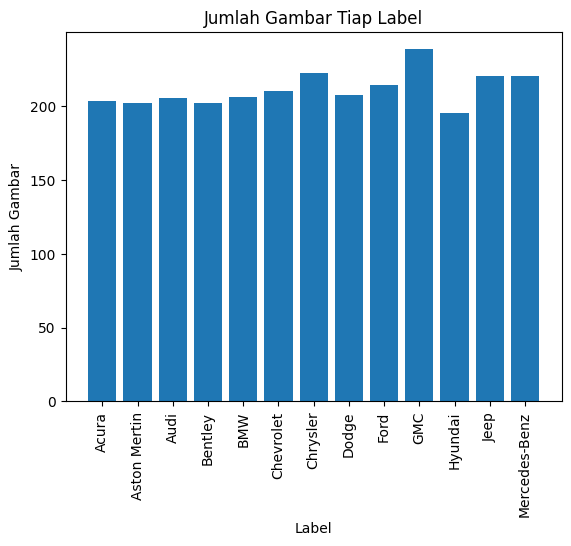

In [6]:
# Visualisasi jumlah gambar tiap kelas
import matplotlib.pyplot as plt

plt.bar(number_label.keys(), number_label.values())
plt.title("Jumlah Gambar Tiap Label")
plt.xticks(rotation=90)
plt.xlabel('Label')
plt.ylabel('Jumlah Gambar')

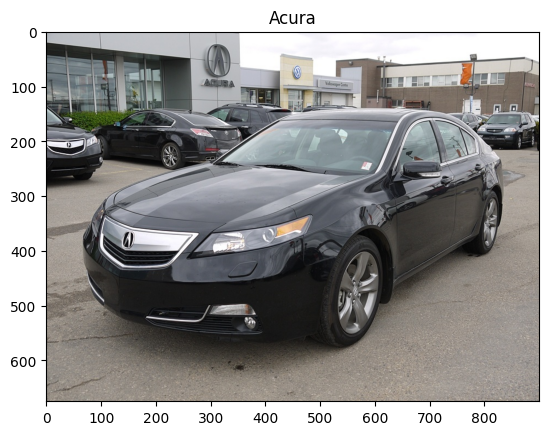

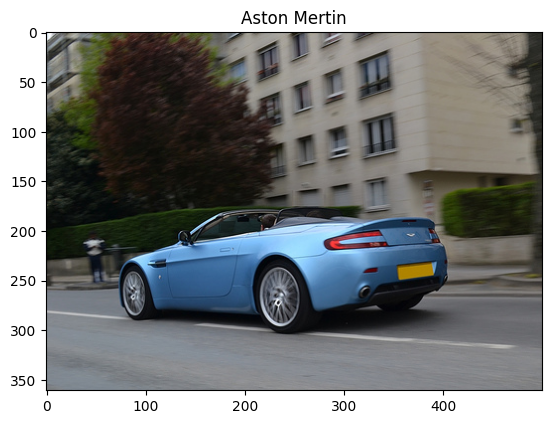

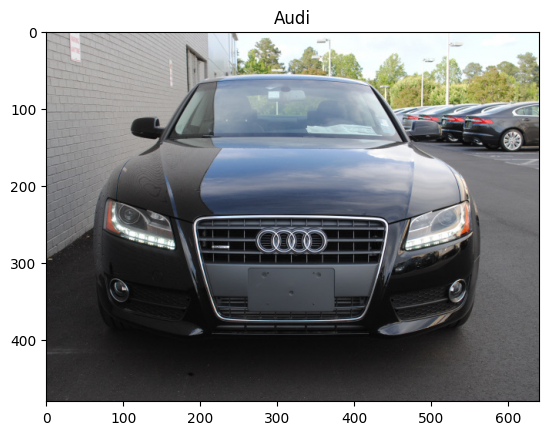

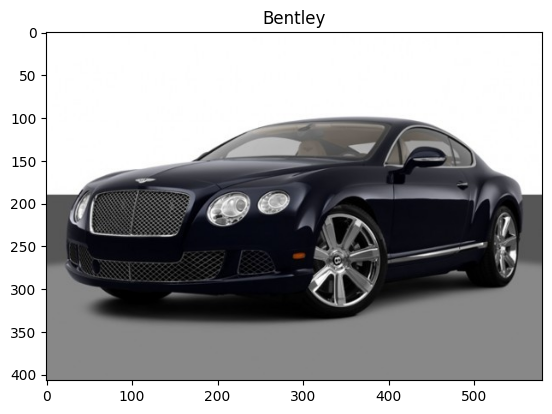

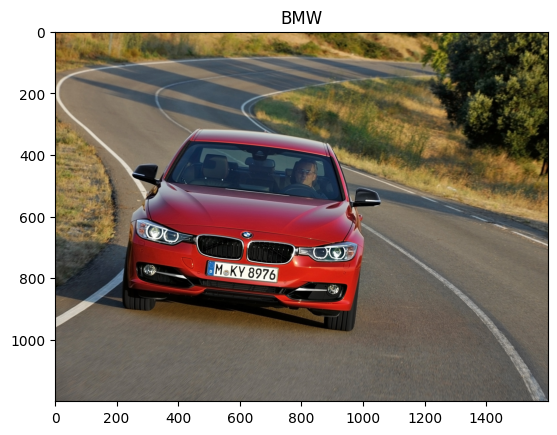

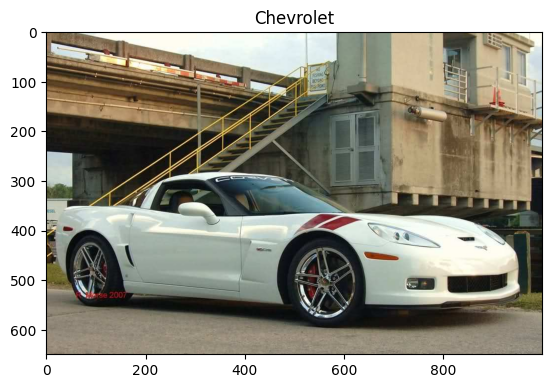

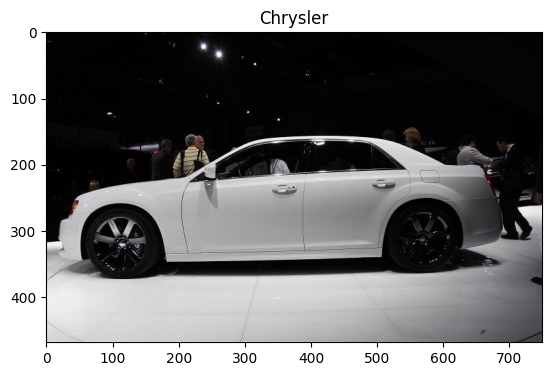

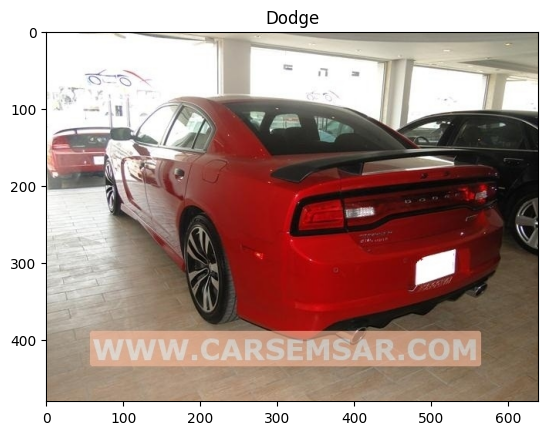

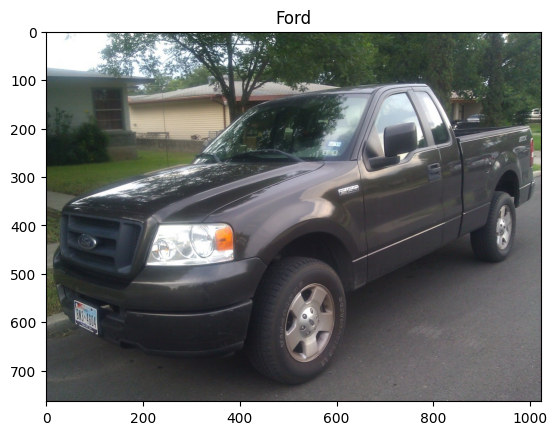

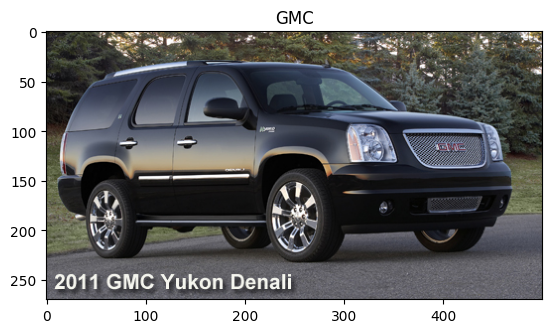

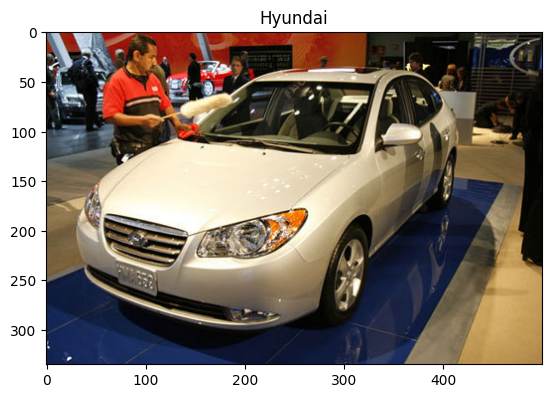

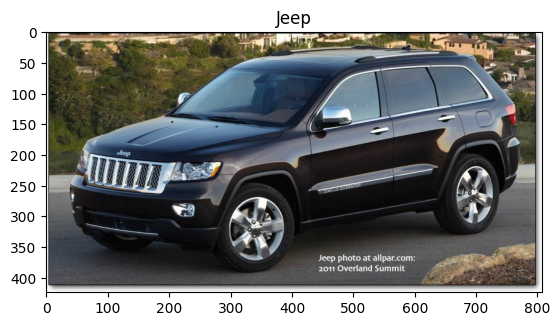

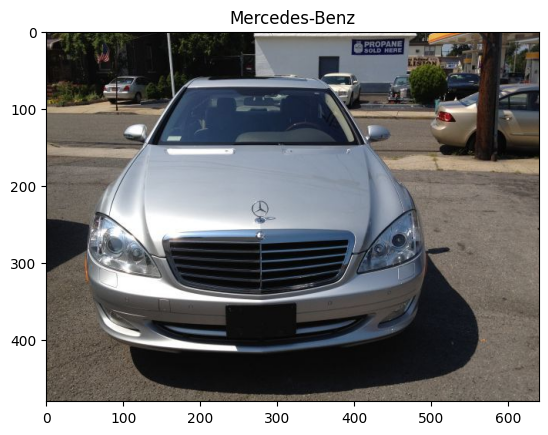

In [7]:
# Menampilkan sampel gambar tiap kelas
import matplotlib.image as mpimg

img_each_class = 1
img_samples = {}
classes = list(number_label.keys())


for c in classes:
    temp = os.listdir(os.path.join(basePath, c))[:img_each_class]
    for item in temp:
        img_path = os.path.join(basePath, c, item)
        img_samples[c] = img_path

for i in img_samples:
    fig = plt.gcf()
    img = mpimg.imread(img_samples[i])
    plt.title(i)
    plt.imshow(img)
    plt.show()

### Data Preparation

In [ ]:
train_path = r'Data/train'
val_path = r'Data/val'
test_path = r'Data/test/'

In [ ]:
# Menggunakan ImageDataGenerator untuk preprocessing
import tensorflow as tf

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

In [ ]:
# Menyiapkan data train dan data validation
train_data = datagen.flow_from_directory(
    train_path,
    class_mode='categorical',
    target_size=(200,200),
    batch_size=32,
    seed=999
)

valid_data = datagen.flow_from_directory(
    val_path,
    class_mode='categorical',
    target_size=(200,200),
    batch_size=32,
    seed=999
)

test_data = datagen.flow_from_directory(
    test_path,
    class_mode='categorical',
    target_size=(200,200),
    batch_size=32,
    seed=999
)

Found 1916 images belonging to 13 classes.
Found 545 images belonging to 13 classes.
Found 283 images belonging to 13 classes.


# Modelling

#### Membuat Arsitektur CNN

Penyusunan Layer

In [ ]:
# Membuat arsitektur model CNN
cnn_model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(200,200, 3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(13, activation='softmax')
])

# Compiling model
cnn_model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
  )

Melatih Model CNN

In [ ]:
# Training model CNN
cnn_hist = cnn_model.fit(
    train_data,
    epochs=4,
    validation_data = valid_data
)

Epoch 1/4
60/60 [==============================] - 25s 406ms/step - loss: 4.5836 - accuracy: 0.1039 - val_loss: 2.5257 - val_accuracy: 0.1358
Epoch 2/4
60/60 [==============================] - 22s 363ms/step - loss: 1.7952 - accuracy: 0.5297 - val_loss: 2.5484 - val_accuracy: 0.1706
Epoch 3/4
60/60 [==============================] - 22s 358ms/step - loss: 0.4054 - accuracy: 0.9332 - val_loss: 2.9849 - val_accuracy: 0.1817
Epoch 4/4
60/60 [==============================] - 22s 364ms/step - loss: 0.0314 - accuracy: 0.9990 - val_loss: 3.2563 - val_accuracy: 0.1706
